In [ ]:
pip

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.

Usage:   
  /opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/bin/python -m pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect info

In [ ]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install neuralprophet

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [ ]:
df = pd.read_csv('/Users/rishis/Downloads/IndianWeatherRepository.csv')

In [ ]:
df.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


In [ ]:
df.location_name.unique

<bound method Series.unique of 0          Ashoknagar
1              Raisen
2          Chhindwara
3               Betul
4         Hoshangabad
             ...     
116106         Niwari
116107        Saitual
116108        Ranipet
116109        Tenkasi
116110         Pendra
Name: location_name, Length: 116111, dtype: object>

In [ ]:
df.columns

Index(['country', 'location_name', 'region', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [ ]:
df.region.unique

<bound method Series.unique of 0         Madhya Pradesh
1         Madhya Pradesh
2         Madhya Pradesh
3         Madhya Pradesh
4         Madhya Pradesh
               ...      
116106     Uttar Pradesh
116107           Mizoram
116108        Tamil Nadu
116109        Tamil Nadu
116110      Chhattisgarh
Name: region, Length: 116111, dtype: object>

In [ ]:
df.last_updated.unique

<bound method Series.unique of 0         2023-08-29 10:45
1         2023-08-29 10:45
2         2023-08-29 10:45
3         2023-08-29 10:45
4         2023-08-29 10:45
                ...       
116106    2024-03-31 21:30
116107    2024-03-31 21:30
116108    2024-03-31 21:30
116109    2024-03-31 21:30
116110    2024-03-31 21:30
Name: last_updated, Length: 116111, dtype: object>

In [ ]:
selected_location = 'Ashoknagar'

In [ ]:
selected_data = df[df['location_name'] == selected_location].copy()

In [ ]:
selected_data['ds'] = pd.to_datetime(selected_data['last_updated'])

In [ ]:
selected_data.drop('last_updated', axis=1, inplace=True)

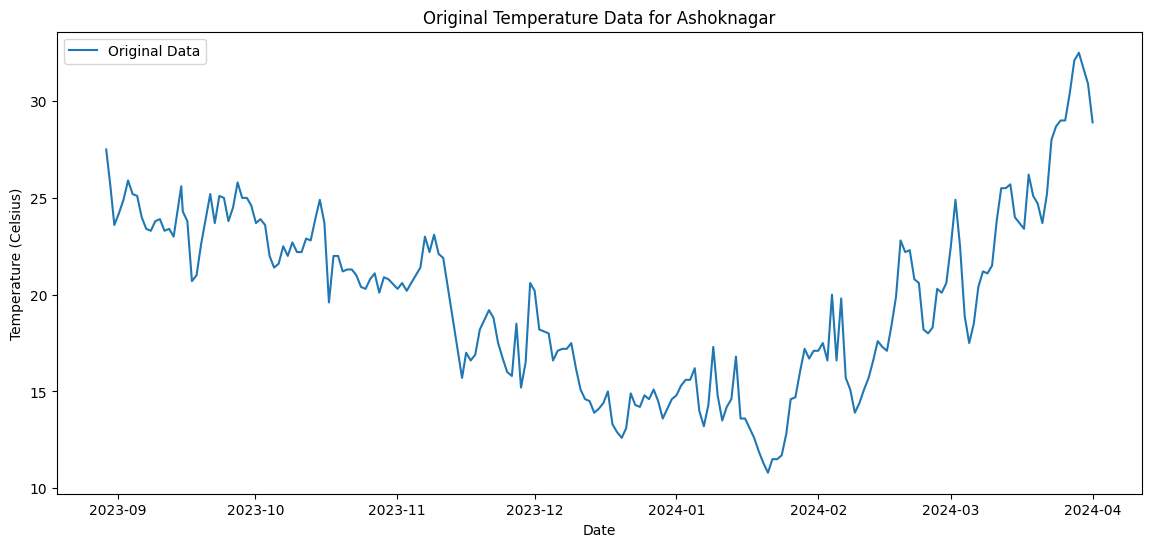

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(selected_data['ds'], selected_data['temperature_celsius'], label='Original Data')
plt.title(f'Original Temperature Data for {selected_location}')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()

In [ ]:
selected_data = selected_data[selected_data['ds'].dt.year.isin([2023, 2024])]

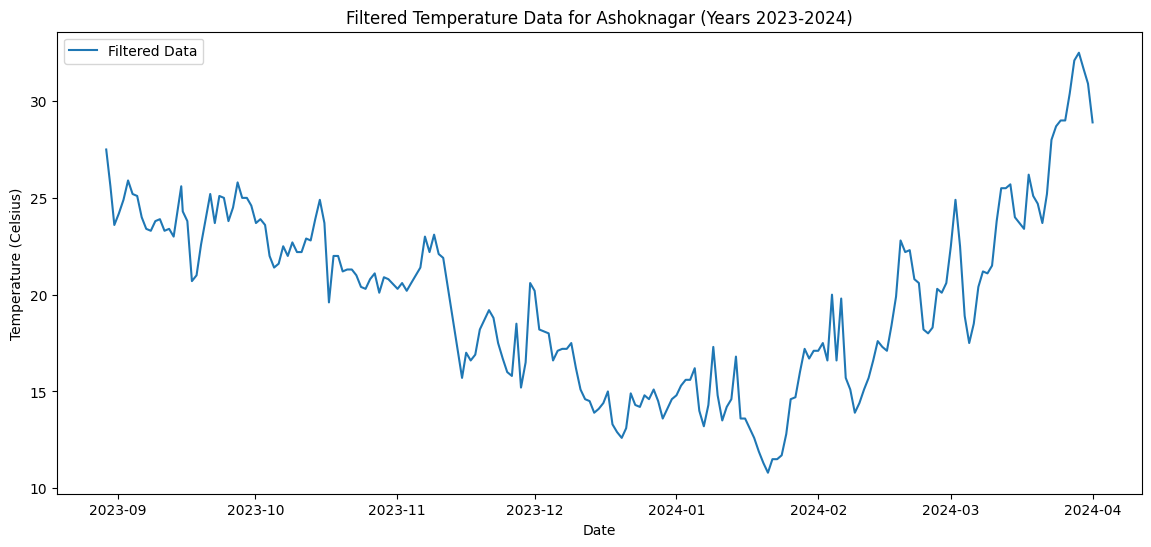

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(selected_data['ds'], selected_data['temperature_celsius'], label='Filtered Data')
plt.title(f'Filtered Temperature Data for {selected_location} (Years 2023-2024)')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()

In [ ]:
print(selected_data.head())

     country location_name          region  latitude  longitude      timezone  \
0      India    Ashoknagar  Madhya Pradesh     24.57      77.72  Asia/Kolkata   
543    India    Ashoknagar  Madhya Pradesh     24.57      77.72  Asia/Kolkata   
1093   India    Ashoknagar  Madhya Pradesh     24.57      77.72  Asia/Kolkata   
1643   India    Ashoknagar  Madhya Pradesh     24.57      77.72  Asia/Kolkata   
2187   India    Ashoknagar  Madhya Pradesh     24.57      77.72  Asia/Kolkata   

      last_updated_epoch  temperature_celsius  temperature_fahrenheit  \
0             1693286100                 27.5                    81.5   
543           1693365300                 25.6                    78.1   
1093          1693439100                 23.6                    74.5   
1643          1693525500                 24.2                    75.6   
2187          1693611900                 24.9                    76.8   

     condition_text  ...  air_quality_PM10  air_quality_us-epa-index  \
0 

In [ ]:
selected_location = 'Ashoknagar'

In [ ]:
selected_data = df[df['location_name'] == selected_location].copy()

In [ ]:
selected_data['ds'] = pd.to_datetime(selected_data['last_updated'])

In [ ]:
selected_data.drop('last_updated', axis=1, inplace=True)

In [ ]:
selected_data.dropna(inplace=True)

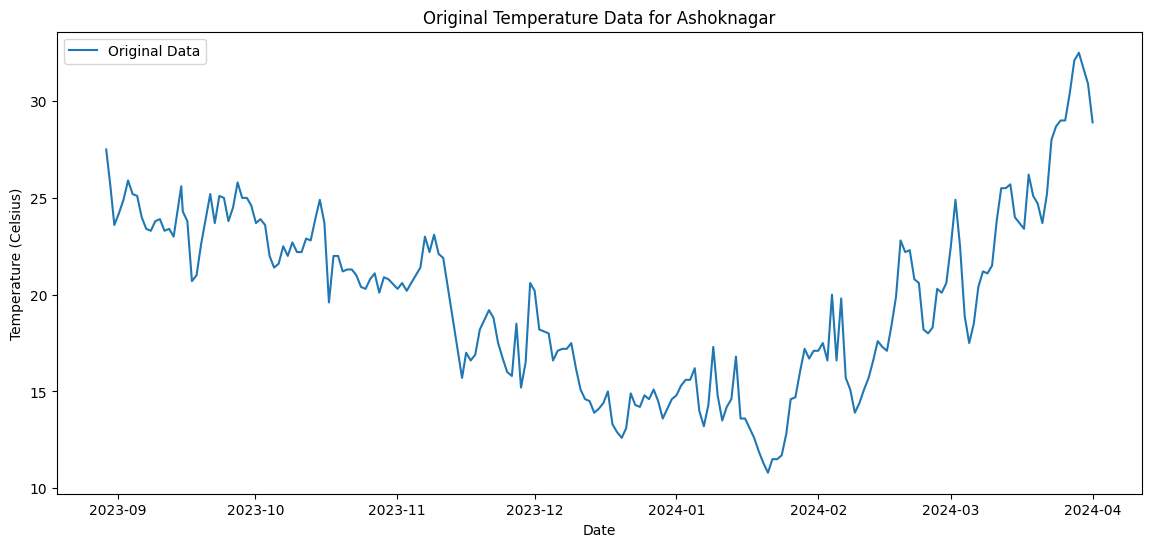

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(selected_data['ds'], selected_data['temperature_celsius'], label='Original Data')
plt.title(f'Original Temperature Data for {selected_location}')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()

In [ ]:
selected_data.rename(columns={'temperature_celsius': 'y'}, inplace=True)

In [ ]:
selected_data.drop(['wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'], axis=1, inplace=True)


In [ ]:
m = NeuralProphet()
model = m.fit(selected_data, freq='H', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 35.545% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_season

Epoch 1000: 100%|█| 1000/1000 [00:00<00:00, 47808.14it/s, loss=0.0123, v_num=1, 


In [ ]:
future = m.make_future_dataframe(selected_data, periods=900)
forecast = m.predict(future)

WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 35.545% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/neuralprophet/df_utils.py:983: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_r

Predicting DataLoader 0: 100%|███████████████████| 1/1 [00:00<00:00, 538.21it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


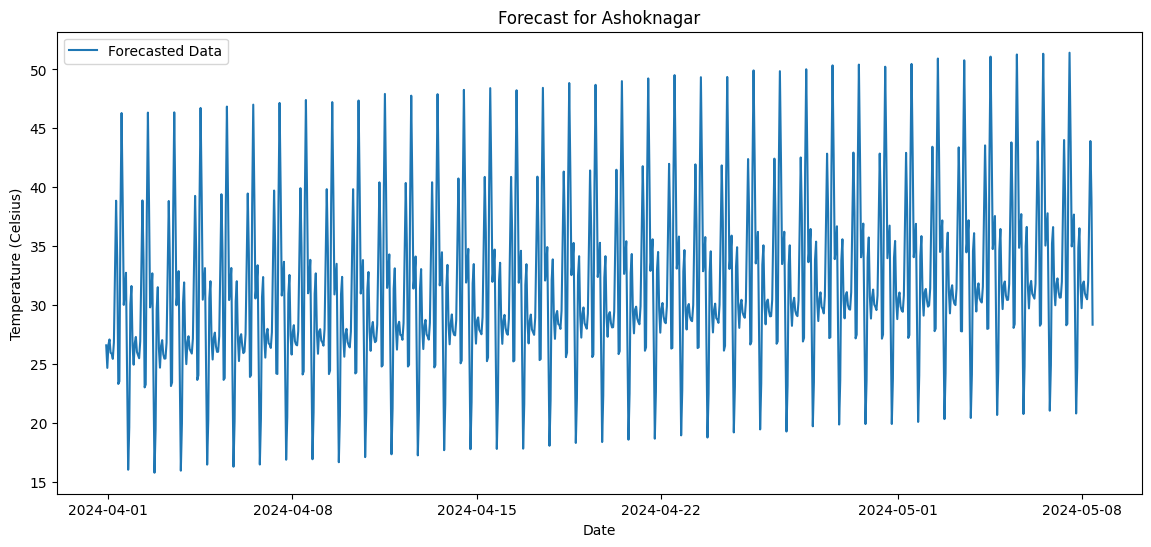

In [ ]:

plt.figure(figsize=(14, 6))
plt.plot(forecast['ds'], forecast['yhat1'], label='Forecasted Data')
plt.title(f'Forecast for {selected_location}')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()
